In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('train_strokes.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [2]:
df=df.drop(df[df['gender']=='Other'].index)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [12]:
# Mode Imputation
df['smoking_status'] = df['smoking_status'].fillna(df['smoking_status'].mode()[0])
df

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,30669,Male,3.0,0,0,No,children,Rural,95.120,18.0,never smoked,0
1,1,30468,Male,58.0,1,0,Yes,Private,Urban,87.960,39.2,never smoked,0
2,2,16523,Female,8.0,0,0,No,Private,Urban,110.890,17.6,never smoked,0
3,3,56543,Female,70.0,0,0,Yes,Private,Rural,69.040,35.9,formerly smoked,0
4,4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.280,19.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43384,43395,56196,Female,10.0,0,0,No,children,Urban,58.640,NaN,never smoked,0
43385,43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,163.865,NaN,formerly smoked,0
43386,43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.940,NaN,formerly smoked,0
43387,43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.160,NaN,never smoked,0


In [13]:
from sklearn.impute import KNNImputer
numerical_float_columns=df.select_dtypes(include=[np.number,'float']).columns.to_list()
selected_data=df[numerical_float_columns]
knn_imputer=KNNImputer(n_neighbors=2)
imputed_data=knn_imputer.fit_transform(selected_data)
imputed_df=pd.DataFrame(imputed_data,columns=numerical_float_columns)
# imputed_df
df['bmi']=imputed_df['bmi']
df

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,30669,Male,3.0,0,0,No,children,Rural,95.120,18.00,never smoked,0
1,1,30468,Male,58.0,1,0,Yes,Private,Urban,87.960,39.20,never smoked,0
2,2,16523,Female,8.0,0,0,No,Private,Urban,110.890,17.60,never smoked,0
3,3,56543,Female,70.0,0,0,Yes,Private,Rural,69.040,35.90,formerly smoked,0
4,4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.280,19.10,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43384,43395,56196,Female,10.0,0,0,No,children,Urban,58.640,22.20,never smoked,0
43385,43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,163.865,47.15,formerly smoked,0
43386,43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.940,27.15,formerly smoked,0
43387,43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.160,27.60,never smoked,0


In [5]:
# To check that there are no more missing values
# df['bmi'].isnull().sum().sum()
df['smoking_status'].isnull().sum().sum()

0

Lower Bound: 8.90
Upper Bound: 47.30
There are 0 Outliers


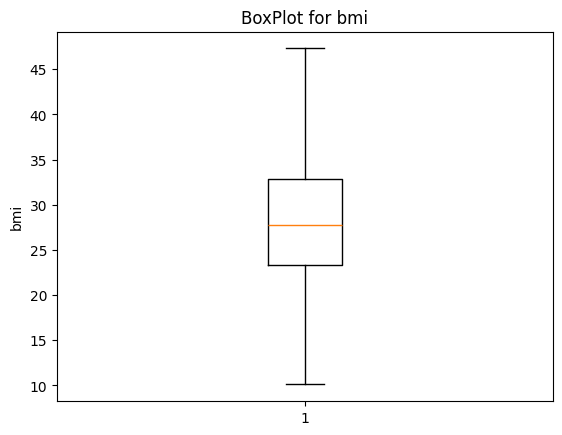

Lower Bound: 25.75
Upper Bound: 163.86
There are 0 Outliers


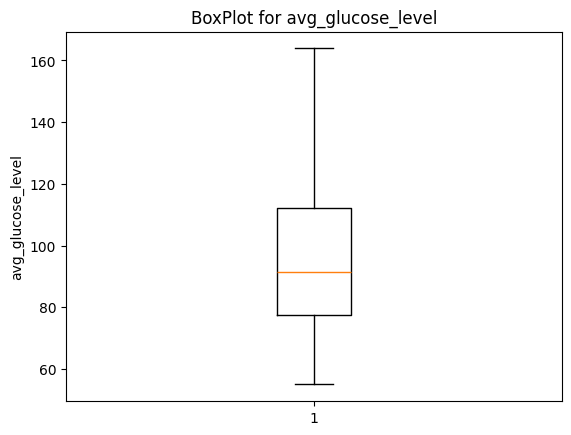

In [14]:
# bmi
# IQR
Q1=df["bmi"].quantile(.25)
Q3=df["bmi"].quantile(.75)
IQR=Q3-Q1

# Lower and Upper Bounds
bmi_LowerBound=Q1-1.5*IQR
print("Lower Bound:",format(bmi_LowerBound,".2f"))
bmi_UpperBound=Q3+1.5*IQR
print("Upper Bound:",format(bmi_UpperBound,".2f"))

# Outliers
Outliers=df[(df["bmi"]<bmi_LowerBound)|(df["bmi"]>bmi_UpperBound)].count()
NumOfOutliers=Outliers.iloc[0]
print("There are",NumOfOutliers,"Outliers")

# BoxPlot
data=(df["bmi"])
plt.boxplot(data)
plt.title("BoxPlot for bmi")
plt.ylabel("bmi")
plt.show()


# glucose
# IQR
Q1=df["avg_glucose_level"].quantile(.25)
Q3=df["avg_glucose_level"].quantile(.75)
IQR=Q3-Q1

# Lower and Upper Bounds
avg_glc_LowerBound=Q1-1.5*IQR
print("Lower Bound:",format(avg_glc_LowerBound,".2f"))
avg_glc_UpperBound=Q3+1.5*IQR
print("Upper Bound:",format(avg_glc_UpperBound,".2f"))

# Outliers
Outliers=df[(df["avg_glucose_level"]<avg_glc_LowerBound)|(df["avg_glucose_level"]>avg_glc_UpperBound)].count()
NumOfOutliers=Outliers.iloc[0]
print("There are",NumOfOutliers,"Outliers")

# BoxPlot
data=(df["avg_glucose_level"])
plt.boxplot(data)
plt.title("BoxPlot for avg_glucose_level")
plt.ylabel("avg_glucose_level")
plt.show()

In [7]:
# bmi
Clamped_DF=df["bmi"].clip(bmi_LowerBound,bmi_UpperBound)
print("\n\nbmi:\nClamped Data Frame:\n",pd.DataFrame(Clamped_DF))
Updated_Cells=((Clamped_DF<df["bmi"])|(Clamped_DF>df["bmi"])).sum()
print("\nNum of Updated Cells:",Updated_Cells)
df['bmi']=Clamped_DF

# avg_glucose_level
Clamped_DF=df["avg_glucose_level"].clip(avg_glc_LowerBound,avg_glc_UpperBound)
print("\n\navg_glucose_level:\nClamped Data Frame:\n",pd.DataFrame(Clamped_DF))
Updated_Cells=((Clamped_DF<df["avg_glucose_level"])|(Clamped_DF>df["avg_glucose_level"])).sum()
print("\nNum of Updated Cells:",Updated_Cells)
df['avg_glucose_level']=Clamped_DF



bmi:
Clamped Data Frame:
         bmi
0      18.0
1      39.2
2      17.6
3      35.9
4      19.1
...     ...
43395   NaN
43396   NaN
43397   NaN
43398   NaN
43399   NaN

[43389 rows x 1 columns]

Num of Updated Cells: 911


avg_glucose_level:
Clamped Data Frame:
        avg_glucose_level
0                 95.120
1                 87.960
2                110.890
3                 69.040
4                161.280
...                  ...
43395             58.640
43396            163.865
43397             91.940
43398             99.160
43399             79.480

[43389 rows x 1 columns]

Num of Updated Cells: 4978


In [8]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.120,18.0,never smoked,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.960,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.890,17.6,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.040,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.280,19.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.640,NaN,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,163.865,NaN,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.940,NaN,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.160,NaN,never smoked,0


In [9]:
df['bmi'].max()

47.3

In [10]:
df.to_csv('preprocessed.csv')
df=pd.read_csv('preprocessed.csv')
df

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,30669,Male,3.0,0,0,No,children,Rural,95.120,18.0,never smoked,0
1,1,30468,Male,58.0,1,0,Yes,Private,Urban,87.960,39.2,never smoked,0
2,2,16523,Female,8.0,0,0,No,Private,Urban,110.890,17.6,never smoked,0
3,3,56543,Female,70.0,0,0,Yes,Private,Rural,69.040,35.9,formerly smoked,0
4,4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.280,19.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43384,43395,56196,Female,10.0,0,0,No,children,Urban,58.640,NaN,never smoked,0
43385,43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,163.865,NaN,formerly smoked,0
43386,43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.940,NaN,formerly smoked,0
43387,43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.160,NaN,never smoked,0


In [1]:
print("Yes")

Yes
